<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum Filter Spasial (Modul 6)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi konvolusi manual (tanpa filter2D)
def convolution(image, kernel):
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape
    pad_h, pad_w = k_height // 2, k_width // 2

    # Padding citra agar konvolusi tidak terpotong di tepi
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=float)

    # Proses konvolusi
    for i in range(img_height):
        for j in range(img_width):
            region = padded[i:i+k_height, j:j+k_width]
            output[i, j] = np.sum(region * kernel)

    # Normalisasi agar tetap 0–255
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)


## 2. Load gambar & ubah ke grayscale

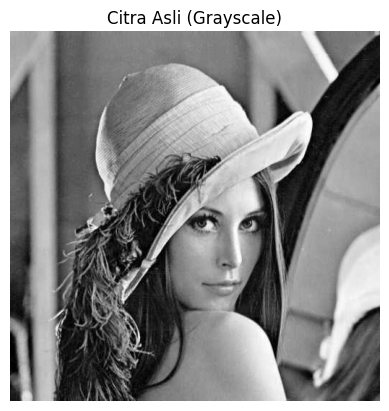

In [4]:
# Ganti path sesuai lokasi file kamu
img_path = '/content/drive/MyDrive/Pcvk/lena.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Citra Asli (Grayscale)')
plt.axis('off')
plt.show()


## Definisi kernel (filter)

In [5]:
# Beberapa kernel dasar
average_filter = (1/9) * np.ones((3,3))
low_pass_filter = (1/12) * np.array([[1,1,1],
                                     [1,4,1],
                                     [1,1,1]])
high_pass_filter = np.array([[-1,0,1],
                             [-1,0,3],
                             [-3,0,1]])
sharpen_filter = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
emboss_filter = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])
sobel_filter = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])
canny_filter = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])


## 4. Terapkan semua filter menggunakan fungsi konvolusi

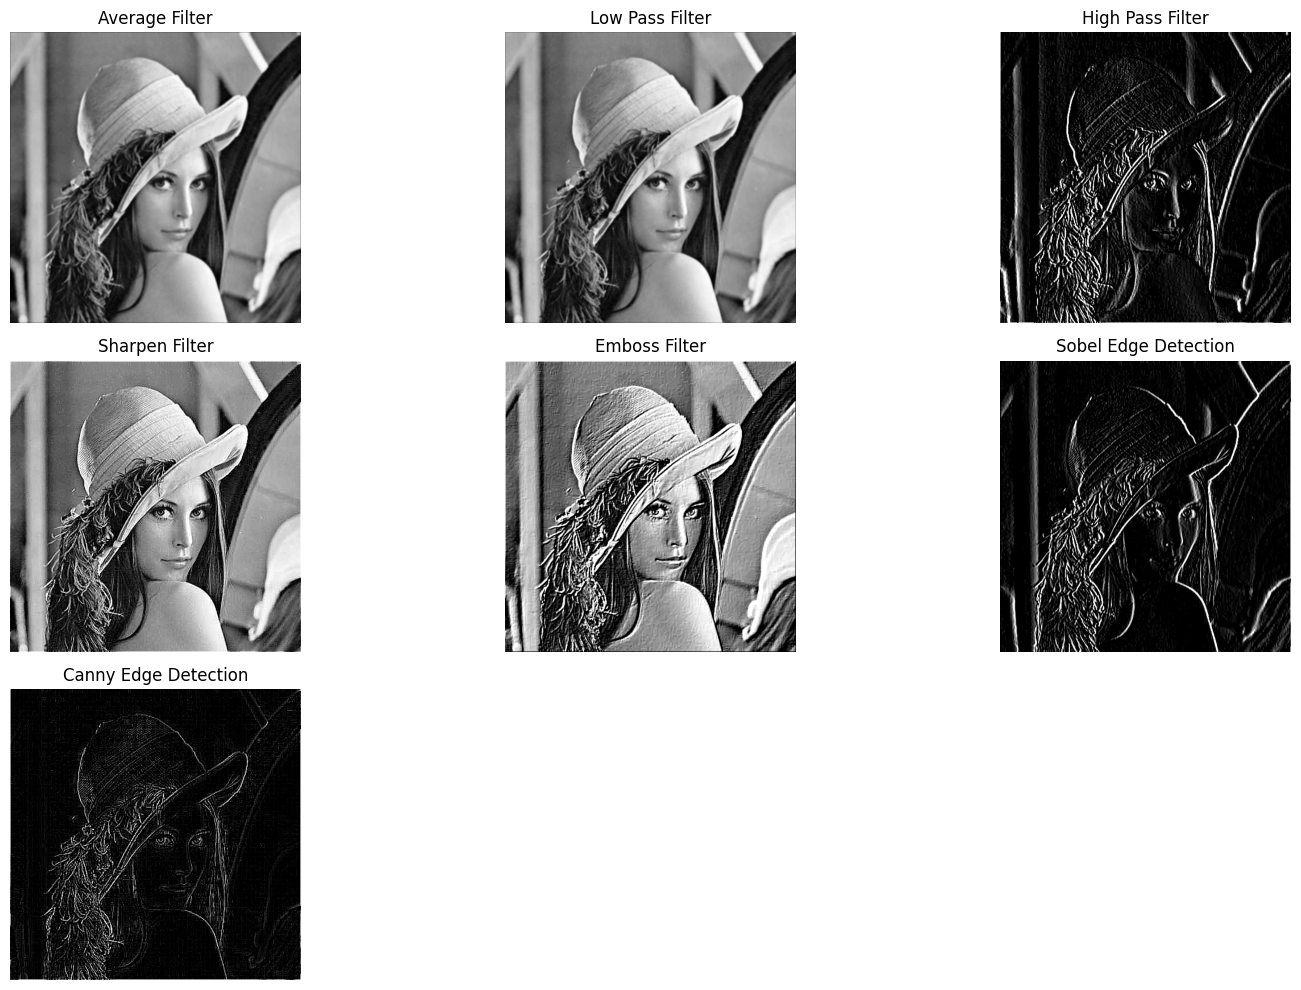

In [6]:
filters = {
    "Average Filter": average_filter,
    "Low Pass Filter": low_pass_filter,
    "High Pass Filter": high_pass_filter,
    "Sharpen Filter": sharpen_filter,
    "Emboss Filter": emboss_filter,
    "Sobel Edge Detection": sobel_filter,
    "Canny Edge Detection": canny_filter
}

# Jalankan konvolusi dan tampilkan hasil
plt.figure(figsize=(15,10))

for idx, (name, kernel) in enumerate(filters.items(), 1):
    result = convolution(gray, kernel)
    plt.subplot(3,3,idx)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Gaussian Blur (menggunakan kernel besar 21×21)

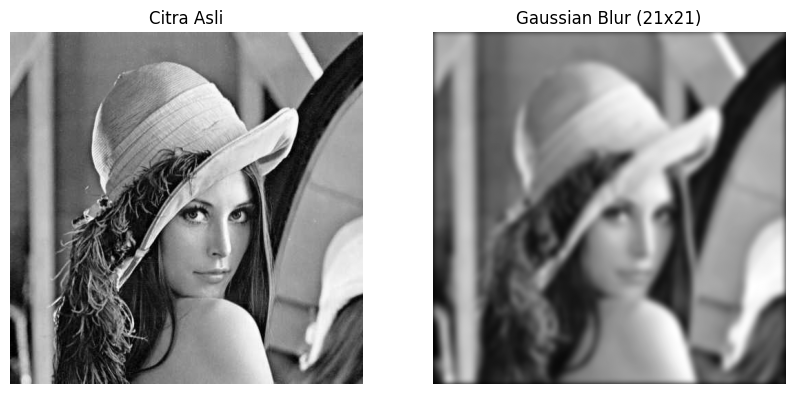

In [7]:
import math

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel_1d = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = gaussian_kernel_1d @ gaussian_kernel_1d.T

gaussian_blur = convolution(gray, gaussian_kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur (21x21)')
plt.axis('off')
plt.show()


## Filter Gaussian, Sharpen, dan Canny (menggunakan OpenCV)

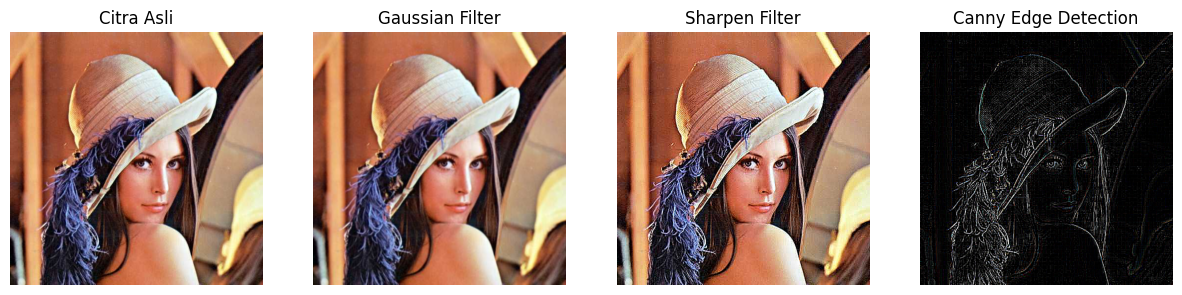

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi bantu untuk menampilkan gambar berdampingan
def show_side_by_side(images, titles, cmap=None):
    plt.figure(figsize=(15,5))
    for i in range(len(images)):
        plt.subplot(1,len(images),i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Baca citra RGB
img_path = '/content/drive/MyDrive/Pcvk/lena.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Definisikan kernel
gaussian_kernel = (1/16) * np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])

sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

canny_kernel = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

# Terapkan filter
gaussian_filtered = cv2.filter2D(img_rgb, -1, gaussian_kernel)
sharpen_filtered = cv2.filter2D(img_rgb, -1, sharpen_kernel)
canny_filtered = cv2.filter2D(img_rgb, -1, canny_kernel)

# Tampilkan hasil
show_side_by_side(
    [img_rgb, gaussian_filtered, sharpen_filtered, canny_filtered],
    ["Citra Asli", "Gaussian Filter", "Sharpen Filter", "Canny Edge Detection"]
)


## Filter Modern: Bilateral dan Guided Filter